For Iris dataset your task is to print steps for every split in the decision tree.

Your Project is divided in 2 parts -

1. Print the Decision tree steps as specified in the example below.

2. Decision Tree Implementation:  Building actual decision tree for the dataset and then printing it.

Note: You can submit multiple times before deadline/evaluation. Your final submission will be evaluated. 


Dataset: Iris dataset.
    
Implementation: Consider the decision tree for OR below:

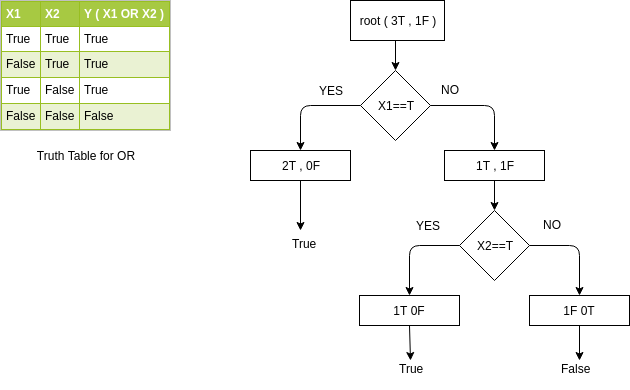

## Implementation Using Sklearn

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import math

In [ ]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(np.append(iris.data, iris.target.reshape(-1, 1), axis = 1), columns = ['sl', 'sw', 'pl', 'pw', 'pred'])

In [ ]:
# If MIN_Value <= val < (m + Mean_Value)/2 then it is assigned label a
# If (m + Mean_Value) <= val < Mean_Value then it is assigned label b
# If (Mean_Value) <= val < (Mean_Value + MAX_Value)/2 then it is assigned label c
# If (Mean_Value + MAX_Value)/2 <= val <= MAX_Value  then it is assigned label d

def label(val, *boundaries):
    if (val < boundaries[0]):
        return 1
    elif (val < boundaries[1]):
        return 2
    elif (val < boundaries[2]):
        return 3
    else:
        return 4

In [ ]:
# Function to convert a continuous data into labelled data. There are 4 lables - a, b, c, d
def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args= (first, second, third))

In [ ]:
# Convert all columns to labelled data
df['sl_labeled'] = toLabel(df, 'sl')
df['sw_labeled'] = toLabel(df, 'sw')
df['pl_labeled'] = toLabel(df, 'pl')
df['pw_labeled'] = toLabel(df, 'pw')
df

,sl,sw,pl,pw,pred,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,5.1,3.5,1.4,0.2,0.0,2,3,1,1
1,4.9,3.0,1.4,0.2,0.0,1,2,1,1
2,4.7,3.2,1.3,0.2,0.0,1,3,1,1
3,4.6,3.1,1.5,0.2,0.0,1,3,1,1
4,5.0,3.6,1.4,0.2,0.0,1,3,1,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,3,2,3,4
146,6.3,2.5,5.0,1.9,2.0,3,1,3,4
147,6.5,3.0,5.2,2.0,2.0,3,2,3,4
148,6.2,3.4,5.4,2.3,2.0,3,3,4,4


In [ ]:
df.drop(['sl', 'sw', 'pl', 'pw'], axis = 1, inplace = True)
df

,pred,sl_labeled,sw_labeled,pl_labeled,pw_labeled
0,0.0,2,3,1,1
1,0.0,1,2,1,1
2,0.0,1,3,1,1
3,0.0,1,3,1,1
4,0.0,1,3,1,1
...,...,...,...,...,...
145,2.0,3,2,3,4
146,2.0,3,1,3,4
147,2.0,3,2,3,4
148,2.0,3,3,4,4


In [ ]:
columns = ['sl_labeled', 'sw_labeled', 'pl_labeled', "pw_labeled", "pred"]
df = df.reindex(columns = columns)

In [ ]:
# Getting the input features
X = df.copy()

# Getting the output
Y = pd.DataFrame(iris.target)

In [ ]:
# Using sklearn's inbuilt decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Splitting the data into test and train data (randomly without any bias)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

# Using sklearn to import the classifier/algorithm
clf = DecisionTreeClassifier()

# Fitting/training the data
clf.fit(x_train, y_train)

# Calculating the score for testing data
clf.score(x_test, y_test)

1.0

## Self Implementation

In [ ]:
# Convert feature labels into a list
featureLabels = list(df.columns)

In [ ]:
# Input features
input = list(df.values)

In [ ]:
# Calculating the entropy (to determine parent/children)
def entropy(data):
  entropy = 0
  labelList = [example[-1] for example in data]
  # To store a particular value once
  uniqueLabelSet = set(labelList)
  labelCount ={}
  # Counting frequency of each label
  for label in labelList :
        if label not in labelCount.keys() :
            labelCount[label] = 0
        labelCount[label] += 1
  # Calculating the entropy
  for label in uniqueLabelSet :
        prob = float(labelCount[label]) / len(data)
        entropy -= prob * math.log(prob, 2)
  return entropy

In [ ]:
# Split the data according to a given feature
def splitData(data, feature, value):
  returnData = []
  for sample in data :
    if sample[feature] == value :
      reducedSample = np.concatenate((sample[: feature], sample[feature + 1 :]))
      # Obtain the splitted data
      returnData.append(reducedSample)
  return returnData

In [ ]:
# Finding the best feature to split upon using information gain
def bestFeatureToSplit(data):
  # Count the number of features
  featureNum = len(data[0]) - 1
  bestFeature = -1
  bestInfoGain= 0.0
  # Calculate entropy for incoming data
  baseEntropy = entropy(data)
  print('Current Entropy is  = ', baseEntropy)
  # Check for pure nodes (leafs)
  if baseEntropy == 0:
    print('Reached Leaf Node')
  # Calculate information gain. First calculate entropy for each children and then substract their weighted average from the parent (baseEntropy)
  for feature in range(featureNum):
    newEntropy = 0
    featureValue = [example[feature] for example in data]
    # Store a particular feature value only once
    uniqueFeatureValue = set(featureValue)
    for value in uniqueFeatureValue :
      subData = splitData(data, feature, value)
      prob = float(len(subData)) / len(data)
      newEntropy += prob * entropy(subData)
    infoGain = baseEntropy - newEntropy
    if infoGain > bestInfoGain :
      bestInfoGain = infoGain
      bestFeature = feature
  # Calculate split information (calculate internal entropy within the feature for each feature value)
  splitInfo = 0
  labelList = [example[bestFeature] for example in data]
  uniqueLabelSet = set(labelList)
  labelCount = {}
  for label in labelList :
    if label not in labelCount.keys() :
      labelCount[label] = 0
    labelCount[label] += 1
  for label in uniqueLabelSet :
    prob = float(labelCount[label]) / len(data)
    splitInfo -= prob * math.log(prob, 2)
  # Calculate Gain Ratio
  gainRatio = bestInfoGain/splitInfo
  print('Splitting on feature', featureLabels[bestFeature], 'with Gain Ratio = ', gainRatio, end = '\n')
  return bestFeature

In [ ]:
# Calculate the majority for an impure node
def majority(classList):
  classCount = {}
  for vote in classList :
    if vote not in classCount.keys() :
      classCount[vote] = 0
    classCount[vote] += 1
  sortedClassCount = sorted(classCount, reverse = True)
  # Final output for an impure node is sortedClassCount
  return sortedClassCount

In [ ]:
def generateTree(data, labels, level, oldData):
  # The label/output list for dataset
  labelList = [example[-1] for example in data]
  # Uniquely identified labels
  uniqueLabelSet = set(labelList)
  labelCount = {}
  for label in labelList :
    if label not in labelCount.keys() :
      labelCount[label] = 0
    labelCount[label] += 1
  # Finding the level at which evaluation takes place
  if data != oldData :
    level += 1
    oldData = data
    print('Level ', level)
  else :
    print('Level ', level)
  # Count of labels corresponding to each parent or child (in the data)
  for label in labelCount :
    print('Count of ', int(label), '= ', labelCount[label])
    if entropy(data) == 0 :
      print('Current Entropy is = ', entropy(data))
      print('Reached Leaf Node', end = '\n')
  # Checking if node is pure/not
  if labelList.count(labelList[0]) == len(labelList) :
    return labelList[0]
  # If node is not pure then we check for the majority label
  if len(data[0]) == 1 :
    return majority(labelList)
  bestFeature = bestFeatureToSplit(data)
  bestFeatureLabel = labels[bestFeature]
  # Initialising the decision tree dictionary (that contains the decision tree)
  decisionTree = {bestFeatureLabel : {}}
  # Delete the feature upon which split has already taken
  del(labels[bestFeature])
  # Decision making by using best feature to split
  featureValues = [example[bestFeature] for example in data]
  uniqueFeatureValues = set(featureValues)
  for value in uniqueFeatureValues :
    subData = splitData(data, bestFeature, value)
    subLabel = labels[:]
    decisionTree[bestFeatureLabel][value] = generateTree(subData, subLabel, level, oldData)
  return decisionTree

In [ ]:
decisionTree = generateTree(input, featureLabels, 0, input)

Level  0
Count of  0 =  50
Count of  1 =  50
Count of  2 =  50
Current Entropy is  =  1.584962500721156
Splitting on feature pw_labeled with Gain Ratio =  0.699638203622209
Level  1
Count of  0 =  50
Current Entropy is =  0.0
Reached Leaf Node
Level  1
Count of  1 =  10
Current Entropy is =  0.0
Reached Leaf Node
Level  1
Count of  1 =  40
Count of  2 =  16
Current Entropy is  =  0.863120568566631
Splitting on feature pl_labeled with Gain Ratio =  0.4334099495621066
Level  2
Count of  1 =  1
Current Entropy is =  0.0
Reached Leaf Node
Level  2
Count of  1 =  39
Count of  2 =  8
Current Entropy is  =  0.6581912658132185
Splitting on feature sl_labeled with Gain Ratio =  0.12674503775809332
Level  3
Count of  2 =  1
Current Entropy is =  0.0
Reached Leaf Node
Level  3
Count of  1 =  14
Current Entropy is =  0.0
Reached Leaf Node
Level  3
Count of  1 =  23
Count of  2 =  7
Current Entropy is  =  0.783776947484701
Splitting on feature sl_labeled with Gain Ratio =  0.07092036405148876
Level

In the above output if the count of a label (either 0/1/2) is not shown, it is 0.

In [ ]:
# Printing the decision tree
print(decisionTree)

{'pw_labeled': {1.0: 0.0, 2.0: 1.0, 3.0: {'pl_labeled': {2.0: 1.0, 3.0: {'sl_labeled': {1.0: 2.0, 2.0: 1.0, 3.0: {'sw_labeled': {1.0: [2.0, 1.0], 2.0: [2.0, 1.0], 3.0: 1.0}}, 4.0: 1.0}}, 4.0: 2.0}}, 4.0: 2.0}}
